In [4]:
import json 
import matplotlib.pyplot as plt
import pickle 
import pandas as pd

In [5]:
COF_model_path = '../models/original/COF.pickle'
COF_features_path = '../models/original/COF.ptxt'
COF_training_set = '../../data/raw-data/original-100.csv'
intercept_model_path = '../models/original/intercept.pickle'
intercept_features_path = '../models/original/intercept.ptxt'
intercept_training_set = '../../data/raw-data/original-100.csv'
test_path = '../../data/splitted-data/mixed5050/test_set.csv'
COF_data_path = '../predicted-results/original/COF_on_5050.json'
intercept_data_path = '../predicted-results/original/intercept_on_5050.json'
feature_clusters = 'feature-clusters.json'

In [6]:
with open(COF_model_path, 'rb') as f: 
    COF_model = pickle.load(f)
with open(COF_features_path, 'rb') as f:
    COF_features = pickle.load(f)
    
COF_df = pd.read_csv(COF_training_set, index_col=0)

with open(intercept_model_path, 'rb') as f:
    intercept_model = pickle.load(f)
with open(intercept_features_path, 'rb') as f:
    intercept_features = pickle.load(f)
    
intercept_df = pd.read_csv(intercept_training_set, index_col=0) 

with open(feature_clusters, 'r') as f:
    clusters = json.load(f)
with open(COF_data_path, 'r') as f:
    COF_data = json.load(f)
with open(intercept_data_path, 'r') as f:
    intercept_data = json.load(f)
with open(test_path, 'r') as f:
    test_set = pd.read_csv(test_path, index_col=0)

In [7]:
results = {'COF': {'x': [], 'y': [],
                   'r_square': COF_data['COF'].pop('r_square')},
           'intercept': {'x': [], 'y': [],
                         'r_square': intercept_data['intercept'].pop('r_square')}}

for idx in COF_data['COF']:
    results['COF']['x'].append(COF_data['COF'][str(idx)]['predicted-COF'])
    results['COF']['y'].append(COF_data['COF'][str(idx)]['simulated-COF'])

for idx in intercept_data['intercept']:
    results['intercept']['x'].append(intercept_data['intercept'][str(idx)]['predicted-intercept'])
    results['intercept']['y'].append(intercept_data['intercept'][str(idx)]['simulated-intercept'])

    

# Need to calculate the ratios to put R Square values

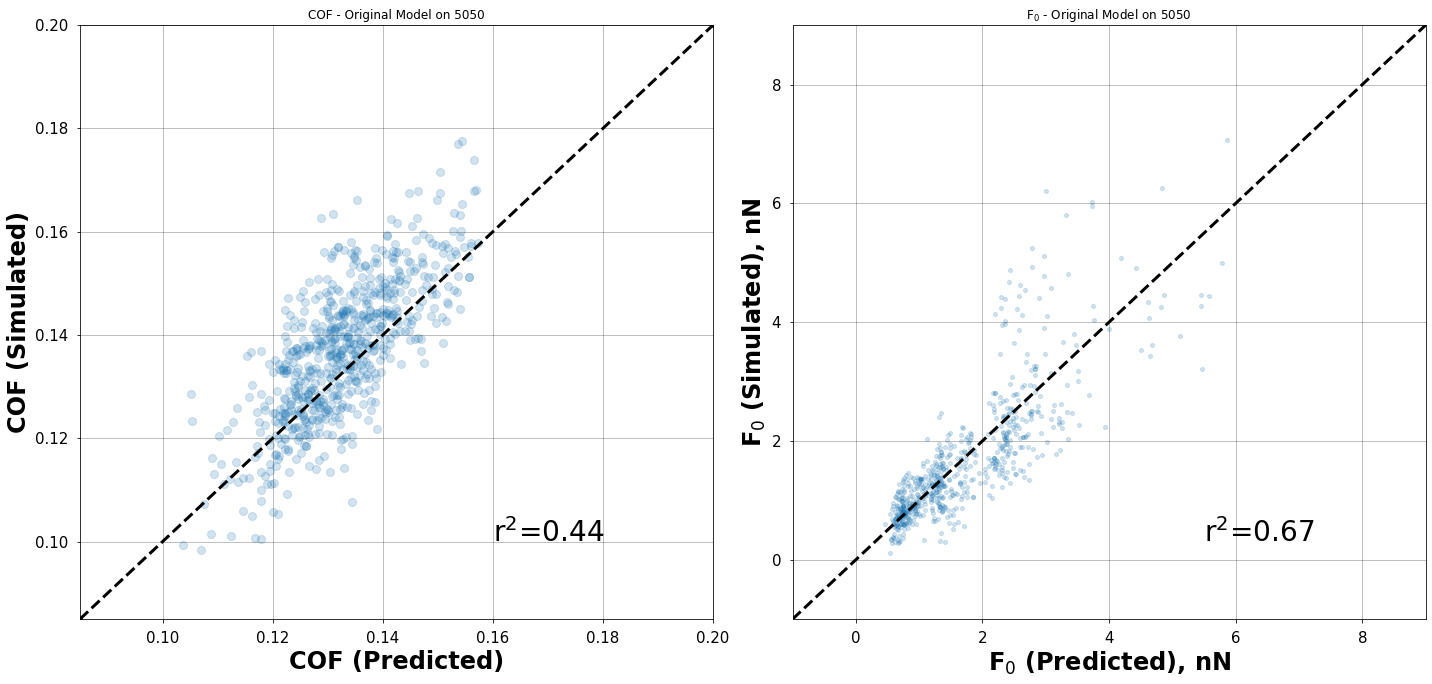

In [43]:
plt.figure(figsize=(20, 18))
alpha = 0.2

# Plot COF
plt.subplot(221)
plt.title('COF - Original Model on 5050')
plt.xlabel('COF (Predicted)', weight='bold')
plt.ylabel('COF (Simulated)', weight='bold')
plt.scatter(results['COF']['x'], results['COF']['y'], alpha=alpha)
plt.xlim(0.085, 0.2)
plt.ylim(0.085, 0.2)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, marker='.')
plt.text(x=0.16, y=0.1, s=f'r$^2$={results["COF"]["r_square"]:.2f}', fontsize = 28)
# Plot intercept
plt.subplot(222)
plt.text(x=5.5, y=0.3, s=f'r$^2$={results["intercept"]["r_square"]:.2f}', fontsize = 28)

plt.title('F$_0$ - Original Model on 5050')
plt.xlabel('F$_{0}$ (Predicted), nN', weight='bold')
plt.ylabel('F$_{0}$ (Simulated), nN', weight='bold')
plt.scatter(results['intercept']['x'], results['intercept']['y'], alpha=alpha, marker='.')
plt.xlim(-1, 9)
plt.ylim(-1, 9)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False)
#plt.text(x=5.5, y=0.3, s=f'r$^2$={results["intercept"]["r_square"]:.2f}', fontsize = 28)


In [6]:
cat_color = {'complexity': 'black', 'qdist': 'yellow', 'shape': 'cornflowerblue', 'size': 'red'}
cat_marker = {'complexity': "d", 'qdist': "o", 'shape': "^", 'size': "s"}

categories = list(cat_color.keys())

mod_clusters = dict()

for cluster in clusters:
    for feature in clusters[cluster]:
        if feature == 'hbonds':
            mod_clusters[feature] = cluster
        else:
            mean = feature+'-mean'
            minimum = feature + '-min'
            mod_clusters[mean] = cluster
            mod_clusters[minimum] = cluster


COF_feature_importances = {'name': COF_features,
                           'value': COF_model.feature_importances_.tolist(),
                           'color': [cat_color[mod_clusters[feature]] for feature in COF_features],
                           'marker': [cat_marker[mod_clusters[feature]] for feature in COF_features]}
intercept_feature_importances = {'name': intercept_features, 
                                 'value': intercept_model.feature_importances_.tolist()}


In [7]:
COF_feature_importances = {'name': COF_features,
                           'value': COF_model.feature_importances_.tolist(),
                           'color': [cat_color[mod_clusters[feature]] for feature in COF_features],
                           'marker': [cat_marker[mod_clusters[feature]] for feature in COF_features],
                           'corr': [COF_df.corr().at['COF', name] for name in COF_features]}
COF_feature_importances = pd.DataFrame(COF_feature_importances)
COF_feature_importances.sort_values(by='value', inplace=True, ascending=True)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/52303660/iterating-markers-in-plots/52303895#52303895
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

In [9]:
from matplotlib.legend_handler import HandlerBase

class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]


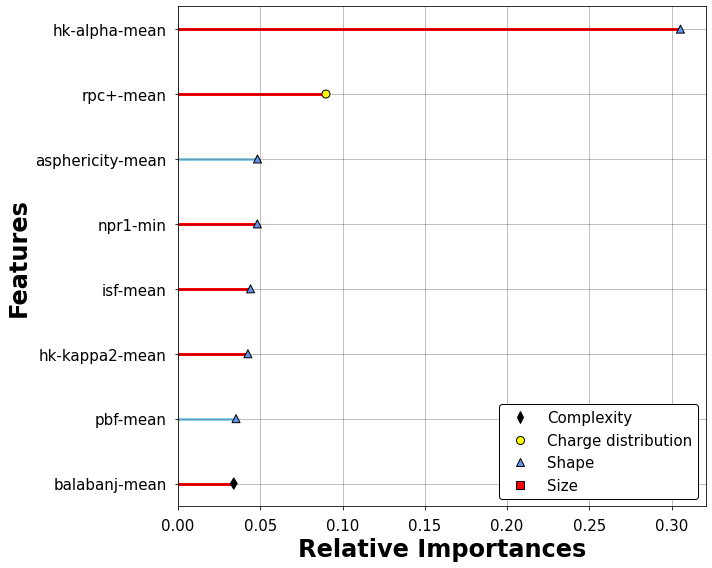

In [10]:
cats_color = {'complexity': 'black', 'qdist': 'yellow',
                  'shape': 'cornflowerblue', 'size': 'red'}
cats = list(cats_color.keys())

#plt.style.use('default')
plt.figure(figsize=(10, 8))


plt.hlines(COF_feature_importances['name'].tail(8),
           xmin=0,
           xmax=COF_feature_importances['value'].tail(8),
           color=['red' if val>=0 else 'skyblue' for val in COF_feature_importances['corr']],
           zorder=1)

mscatter(COF_feature_importances['value'].tail(8), 
            COF_feature_importances['name'].tail(8),
            m=COF_feature_importances['marker'].tail(8),
            color=COF_feature_importances['color'].tail(8),
            edgecolor='black',
            linewidth=1,
            zorder=2,
            )
plt.ylabel('Features')
plt.xlabel('Relative Importances')
plt.xlim(0)

cat_color = {'complexity': 'black', 'qdist': 'yellow', 'shape': 'cornflowerblue', 'size': 'red'}
cat_marker = {'complexity': "d", 'qdist': "o", 'shape': "^", 'size': "s"}

leg = plt.legend([('black', 'd'), ('yellow', 'o'), ('cornflowerblue', '^'), ('red', 's')],
           ['Complexity','Charge distribution','Shape','Size'],
           edgecolor='black',
            handler_map={tuple:MarkerHandler()})

for legobj in leg.legendHandles:
    legobj.set_markeredgecolor('black')
    legobj.set_markeredgewidth(1)
    


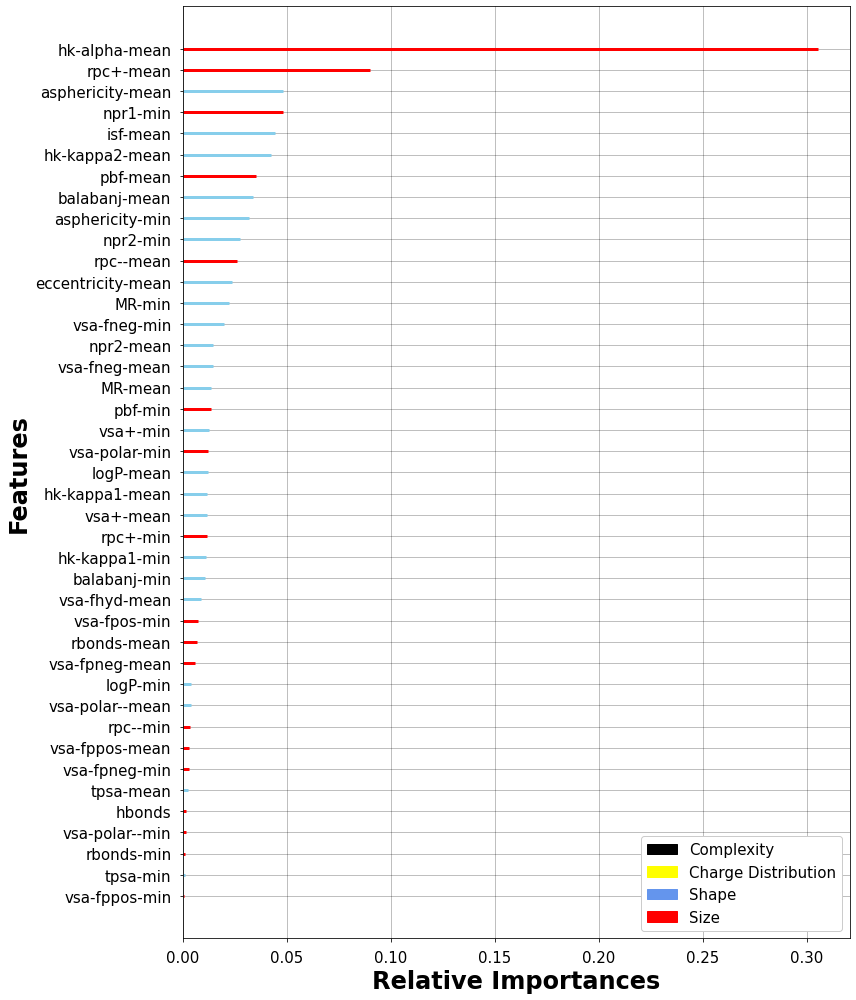

In [11]:
plt.figure(figsize=(12, 14))

plt.hlines(COF_feature_importances['name'],
           xmin=0,
           xmax=COF_feature_importances['value'],
           color=['red' if val>=0 else 'skyblue' for val in COF_feature_importances['corr']])

plt.ylabel('Features')
plt.xlabel('Relative Importances')
plt.xlim(0)

handles = [plt.Rectangle((0,0),1,1, color=cats_color[cat]) 
           for cat in cats]
plt.legend(handles, ['Complexity', 'Charge Distribution', 'Shape', 'Size'], prop={'size': 15}, loc=4)

In [12]:
import plotting
from plotting import *

In [13]:
# print(COF_model)
# print(COF_features)
# print(intercept_model)
# print(intercept_features)
# print(feature_clusters)
# They are all here

In [14]:
# # Test plot_feature_importances
# plot_feature_importances(model=COF_model,
#                         train_df=COF_df,
#                         features=COF_features,
#                         feature_clusters=feature_clusters,
#                         target='COF',
#                         output='./test')


In [15]:
# # Test plot_double_feature_importances
# plot_double_feature_importances(COF_model=COF_model,
#                                 COF_features=COF_features,
#                                 COF_train_df=COF_df,
#                                 intercept_model=intercept_model,
#                                 intercept_features=intercept_features,
#                                 intercept_train_df=intercept_df,
#                                 feature_clusters=feature_clusters,
#                                 output='test'
#                                )

In [16]:
# plot simulated vs predicted 
plot_simulated_predicted(predicted_data=COF_data_path,
                         output='test',
                         bound_lines=0.1)

In [17]:
#plot double simulate vs predicted 
plot_double_simulated_predicted(COF_data=COF_data_path,
                               intercept_data=intercept_data_path,
                               output='test',
                               bound_lines=None)

In [18]:
print(matplotlib.matplotlib_fname())

/Users/quachcd/Documents/science/projects/tribology/iMoDELS-supplements/random-forest/src/matplotlibrc
